### Сводные таблицы

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset('titanic')

In [2]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
titanic.groupby('sex')['survived'].mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [4]:
# процент выживших по полу
titanic.groupby('sex')[['survived']].mean() * 100

,survived
sex,
female,74.203822
male,18.890815


In [5]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean')

sex     class 
female  First     0.968085
        Second    0.921053
        Third     0.500000
male    First     0.368852
        Second    0.157407
        Third     0.135447
Name: survived, dtype: float64

In [6]:
titanic.groupby(['sex', 'class'])['survived'].aggregate(['mean', 'count'])

mean  count
sex    class                  
female First   0.968085     94
       Second  0.921053     76
       Third   0.500000    144
male   First   0.368852    122
       Second  0.157407    108
       Third   0.135447    347

In [7]:
titanic[titanic['survived'] != 1].groupby(['sex', 'class'])['survived'].aggregate(['count'])

count
sex    class        
female First       3
       Second      6
       Third      72
male   First      77
       Second     91
       Third     300

In [8]:
print('Всего женщин в первом классе: ', len(titanic[(titanic['sex'] == 'female') & (titanic['class'] == 'First')]))
print('Спаслось женщин в первом классе: ', len(titanic[(titanic['sex'] == 'female') & (titanic['class'] == 'First') & (titanic['survived'] == 1)]))
print('Погибло женщин в первом классе: ', len(titanic[(titanic['sex'] == 'female') & (titanic['class'] == 'First') & (titanic['survived'] == 0)]))

Всего женщин в первом классе:  94
Спаслось женщин в первом классе:  91
Погибло женщин в первом классе:  3


In [9]:
a = str(len(titanic[(titanic['sex'] == 'female') & (titanic['class'] == 'First')]))
b = str(len(titanic[(titanic['sex'] == 'female') & (titanic['class'] == 'First') & (titanic['survived'] == 1)]))
c = str(len(titanic[(titanic['sex'] == 'female') & (titanic['class'] == 'First') & (titanic['survived'] == 0)]))
print('{0:5s} было на борту женщин из первого класса'.format(a).upper())
print('{0:5s} выжило женщин из первого класса'.format(b).upper())
print('{0:5s} погибло женщин из первого класса'.format(c).upper())

94    БЫЛО НА БОРТУ ЖЕНЩИН ИЗ ПЕРВОГО КЛАССА
91    ВЫЖИЛО ЖЕНЩИН ИЗ ПЕРВОГО КЛАССА
3     ПОГИБЛО ЖЕНЩИН ИЗ ПЕРВОГО КЛАССА


In [10]:
91/94


0.9680851063829787

In [11]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


#### Синтаксис сводных таблиц

In [12]:
titanic.pivot_table('survived', index = 'sex', columns = 'class') # то же, что выше

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


##### Многоуровневые сводные таблицы

Разобъем возраст на интервалы

In [13]:
age = pd.cut(titanic['age'], [0,18,21,33,60,100])

In [14]:
titanic.pivot_table('survived',  ['sex', age], 'class') 

class                First    Second     Third
sex    age                                    
female (0, 18]    0.909091  1.000000  0.511628
       (18, 21]   1.000000  1.000000  0.375000
       (21, 33]   0.960000  0.906250  0.514286
       (33, 60]   0.976190  0.880000  0.200000
       (60, 100]  1.000000       NaN  1.000000
male   (0, 18]    0.800000  0.600000  0.215686
       (18, 21]   0.000000  0.142857  0.128205
       (21, 33]   0.478261  0.051282  0.180952
       (33, 60]   0.413793  0.057143  0.055556
       (60, 100]  0.083333  0.333333  0.000000

In [15]:
age = pd.cut(titanic['age'], [0,18,80])

In [16]:
titanic.pivot_table('survived',  ['sex', age], 'class') 

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [17]:
fare = pd.qcut(titanic['fare'], 2) # разбиваем на квантили по стоимости билета
titanic.pivot_table('survived',  ['sex', age], [fare,'class']) 

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

#### Дополнительные параметры сводных таблиц

In [18]:
titanic.pivot_table(index='sex', columns='class', aggfunc={'survived':sum, 'fare': 'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [19]:
#Итоги по каждой группе
titanic.pivot_table('survived',  index='sex', columns='class', margins=True, margins_name='Итог') 

class,First,Second,Third,Итог
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
Итог,0.629630,0.472826,0.242363,0.383838


#### Пример: данные о рождаемости

In [20]:
births = pd.read_csv('births.csv')

In [21]:
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [22]:
births['decade'] = 10 * (births['year'] //10)

In [23]:
births.head()

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960


In [24]:
bpt = births.pivot_table('births', index='decade', columns='gender', aggfunc=sum)
bpt

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


Text(0.5,0,'Десятилетие')

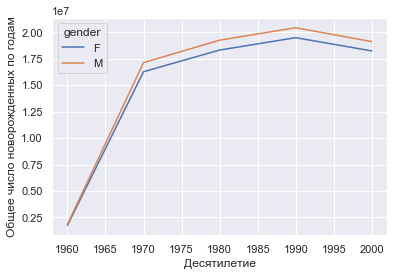

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set()
bpt.plot()
plt.ylabel('Общее число новорожденных по годам')
plt.xlabel('Десятилетие')

Text(0.5,0,'Десятилетие')

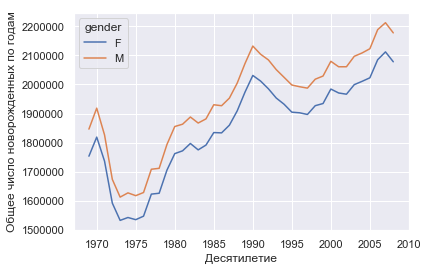

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set()
births.pivot_table('births', index='year', columns='gender', aggfunc=sum).plot()
plt.ylabel('Общее число новорожденных по годам')
plt.xlabel('Десятилетие')

##### Сигма-отсечение аномальных данных

In [27]:
quartiles = np.percentile(births['births'], [25,50,75])
quartiles

array([4358. , 4814. , 5289.5])

In [28]:
mu = quartiles[1]
sig = 0.74*(quartiles[2] - quartiles[0]) # грубая оценка среднего выборки, где 
# 0,74 - примерно межквартильный размах Гауссового распределения
print('mu={0}  ,  sig={1}'.format(mu, sig))

mu=4814.0  ,  sig=689.31


In [29]:
births=births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')
#births
sig

689.31

In [30]:
mu - 5 * sig

1367.4500000000003

In [31]:
mu + 5 * sig

8260.55

In [32]:
births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14610 entries, 0 to 15066
Data columns (total 6 columns):
year      14610 non-null int64
month     14610 non-null int64
day       14610 non-null float64
gender    14610 non-null object
births    14610 non-null int64
decade    14610 non-null int64
dtypes: float64(1), int64(4), object(1)
memory usage: 799.0+ KB


In [33]:
# сделаем тип столбца day целочисленным
births['day']=births['day'].astype(int)

In [34]:
births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14610 entries, 0 to 15066
Data columns (total 6 columns):
year      14610 non-null int64
month     14610 non-null int64
day       14610 non-null int32
gender    14610 non-null object
births    14610 non-null int64
decade    14610 non-null int64
dtypes: int32(1), int64(4), object(1)
memory usage: 741.9+ KB


In [35]:
# создадим индекс для даты из года, месяца и дня
births.index = pd.to_datetime(10000 * births.year + 
                             100 * births.month + 
                             births.day, format='%Y%m%d')

In [36]:
births['dayofweek'] = births.index.dayofweek #день недели

In [37]:
births.head()

,year,month,day,gender,births,decade,dayofweek
1969-01-01,1969,1,1,F,4046,1960,2
1969-01-01,1969,1,1,M,4440,1960,2
1969-01-02,1969,1,2,F,4454,1960,3
1969-01-02,1969,1,2,M,4548,1960,3
1969-01-03,1969,1,3,F,4548,1960,4


In [38]:
import matplotlib.pyplot as plt
import matplotlib as mpl

Text(0,0.5,'Среднее кол-во новорожденных в день')

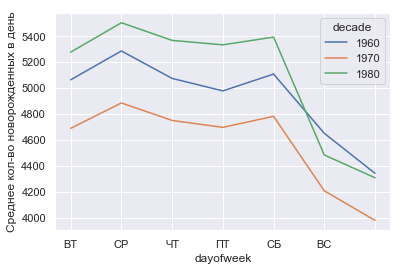

In [39]:
births.pivot_table('births', index='dayofweek', 
                   columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['ПН', 'ВТ', 'СР', 'ЧТ', 'ПТ', 'СБ', 'ВС'])
plt.ylabel('Среднее кол-во новорожденных в день')

In [40]:
# построим график среднего числа рождений по дням года
births_by_date = births.pivot_table('births', [births.index.month, births.index.day])
births_by_date.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

In [41]:
# укажем високосный год, т.к. он содержит все даты
births_by_date.index = [pd.datetime(2016, month, day) 
                       for (month, day) in births_by_date.index]
births_by_date.head()

,births
2016-01-01,4009.225
2016-01-02,4247.400
2016-01-03,4500.900
2016-01-04,4571.350
2016-01-05,4603.625


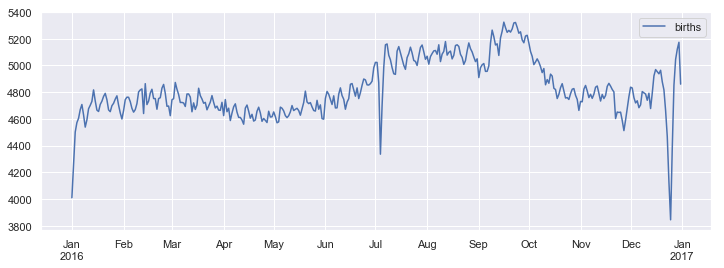

In [42]:
# строим график
fig, ax = plt.subplots(figsize=(12,4))
births_by_date.plot(ax=ax)

### Векторизованные опреации над строками

In [43]:
data = ['peter', 'Paul', None, 'MARY', 'gUIDO']
[c.capitalize() for c in data]

AttributeError: 'NoneType' object has no attribute 'capitalize'

In [44]:
import pandas as pd
names = pd.Series(data)
names

0    peter
1     Paul
2     None
3     MARY
4    gUIDO
dtype: object

In [45]:
# теперь игнорорируем пропущенные значения
names.str.capitalize()

0    Peter
1     Paul
2     None
3     Mary
4    Guido
dtype: object

#### Методы работы со строками

In [46]:
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam', 
                   'Eric Idle', 'Terry Jones', 'Michael Palin'])

In [47]:
monte.str.upper()

0    GRAHAM CHAPMAN
1       JOHN CLEESE
2     TERRY GILLIAM
3         ERIC IDLE
4       TERRY JONES
5     MICHAEL PALIN
dtype: object

In [48]:
monte.str.split()

0    [Graham, Chapman]
1       [John, Cleese]
2     [Terry, Gilliam]
3         [Eric, Idle]
4       [Terry, Jones]
5     [Michael, Palin]
dtype: object

In [49]:
monte.str.partition()

,0,1,2
0,Graham,,Chapman
1,John,,Cleese
2,Terry,,Gilliam
3,Eric,,Idle
4,Terry,,Jones
5,Michael,,Palin


In [50]:
monte.str.len()

0    14
1    11
2    13
3     9
4    11
5    13
dtype: int64

In [51]:
monte.str.startswith('T')

0    False
1    False
2     True
3    False
4     True
5    False
dtype: bool

#### Методы, использующие регулярные выражения

In [52]:
monte.str.extract('([A-Za-z]+)') # поиск непрерывной группы символов в начале строки

,0
0,Graham
1,John
2,Terry
3,Eric
4,Terry
5,Michael


In [53]:
# найдем все имена, начинающиеся и заканчивающиеся согласной
# ^ - начало строки,  $ - конец
monte.str.findall(r'^[^AEIOU].*[^aeiou]$')

0    [Graham Chapman]
1                  []
2     [Terry Gilliam]
3                  []
4       [Terry Jones]
5     [Michael Palin]
dtype: object

In [54]:
monte.str.replace('RR'.lower(), '##') 

0    Graham Chapman
1       John Cleese
2     Te##y Gilliam
3         Eric Idle
4       Te##y Jones
5     Michael Palin
dtype: object

In [55]:
monte.str.upper().str.replace('rr'.upper(), '-МАТ-') 

0      GRAHAM CHAPMAN
1         JOHN CLEESE
2    TE-МАТ-Y GILLIAM
3           ERIC IDLE
4      TE-МАТ-Y JONES
5       MICHAEL PALIN
dtype: object

#### Прочие методы

In [56]:
";".join(monte)

'Graham Chapman;John Cleese;Terry Gilliam;Eric Idle;Terry Jones;Michael Palin'

In [57]:
# вырезать первые 4 символа из каждой строки
monte.str.slice(0,4)

0    Grah
1    John
2    Terr
3    Eric
4    Terr
5    Mich
dtype: object

In [58]:
# то же самое
monte.str[0:4]

0    Grah
1    John
2    Terr
3    Eric
4    Terr
5    Mich
dtype: object

In [59]:
monte.str.get(1)

0    r
1    o
2    e
3    r
4    e
5    i
dtype: object

In [60]:
# извлечем фамилии
monte.str.split().str.get(-1)

0    Chapman
1     Cleese
2    Gilliam
3       Idle
4      Jones
5      Palin
dtype: object

In [61]:
# извлечем первые буквы фамилий
monte.str.split().str.get(-1).str.get(0)

0    C
1    C
2    G
3    I
4    J
5    P
dtype: object

##### Индикаторные переменные

In [62]:
# A = "родился в США"
# B = "родися в Великобритании"
# C = "любит сыр"
# D = "любит консервы"
full_monte = pd.DataFrame({
    'info': ['B|C|D', 'B|D', 'A|C', 'B|D', 'B|C', 'B|C|D'],
    'name': monte
})
full_monte

,info,name
0,B|C|D,Graham Chapman
1,B|D,John Cleese
2,A|C,Terry Gilliam
3,B|D,Eric Idle
4,B|C,Terry Jones
5,B|C|D,Michael Palin


In [63]:
# МОЖЕМ РАЗБИТЬ ВСЕ ИНДИКАТОРЫ И ЗАЭНКОДИТЬ ИХ КАК ПРИЗНАКИ
full_monte['info'].str.get_dummies('|')

,A,B,C,D
0,0,1,1,1
1,0,1,0,1
2,1,0,1,0
3,0,1,0,1
4,0,1,1,0
5,0,1,1,1


In [64]:
full_monte.join(full_monte['info'].str.get_dummies('|'))

,info,name,A,B,C,D
0,B|C|D,Graham Chapman,0,1,1,1
1,B|D,John Cleese,0,1,0,1
2,A|C,Terry Gilliam,1,0,1,0
3,B|D,Eric Idle,0,1,0,1
4,B|C,Terry Jones,0,1,1,0
5,B|C|D,Michael Palin,0,1,1,1


### Пример: БД рецептов

In [1]:
import pandas as pd
import numpy as np

In [2]:
try:
    recipes = pd.read_json('recipeitems-latest3.json')
except ValueError as e:
    print("ValueError: ", e)

In [3]:
recipes

,1,2,3,4,5,6,7,8,9,10,...,35,36,37,38,39,40,41,42,43,44
_id,{'$oid': '51609b4f96cc620a5db6dbee'},{'$oid': '51609b5296cc6208c17940f1'},{'$oid': '51609b5296cc620a5db6dbef'},{'$oid': '51609b5396cc6208c17940f2'},{'$oid': '51609b5496cc620a5db6dbf0'},{'$oid': '5160757a96cc6207b12d18da'},{'$oid': '5160757b96cc6207a37ff77a'},{'$oid': '5160757b96cc6207aada3231'},{'$oid': '5160757c96cc62079cc2db1c'},{'$oid': '5160757d96cc6207a37ff77b'},...,{'$oid': '5160759296cc6207a37ff781'},{'$oid': '516075da96cc6208b330012c'},{'$oid': '516075dd96cc6208b330012d'},{'$oid': '516075df96cc6208b330012e'},{'$oid': '516075e096cc6208ba280483'},{'$oid': '516075e296cc6208b330012f'},{'$oid': '516075e496cc6208b3300130'},{'$oid': '516075e696cc6208b3300131'},{'$oid': '516075e896cc6208b3300132'},{'$oid': '516075e896cc6208ba280484'}
cookTime,None,None,None,PT30M,None,PT30M,PT50M,PT10M,PT,PT5M,...,NaN,PT1H,PT20M,PT5M,NaN,PT10M,PT,PT4H,PT25M,NaN
creator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Erin Alderson,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dateModified,NaN,NaN,NaN,NaN,NaN,2013-03-24T04:41:42+00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
datePublished,NaN,NaN,NaN,NaN,NaN,2012-11-26T12:00:18+00:00,2013-02-04,2013-03-22T09:03:10+00:00,2013-04-01,2013-02-11,...,2013-04-04,2012-08-18,2012-08-20,2012-08-22,2013-04-01,2012-08-29,2012-08-31,2012-09-04,2012-09-10,2013-04-01
description,I tried to post this a minute age but it showe...,"A classic Jewish dish, traditionally cooked ov...",This is a well received tossed broccoli salad ...,None,Korean grilled short ribs are one of the most ...,A few weeks ago i wanted to make new pumpkin d...,Popovers are the most delightful thing my oven...,My daily schedule is somewhat odd. I've been p...,Got leftover Easter eggs? Got leftover East...,"A quick lunchtime brown rice bowl with kale, c...",...,"How a package from Jaipur, India inspired lots...","On this morning's Food Network episode, I make...",I love grilled vegetables more than anything o...,I love compound butter. I made some with berri...,No tandoor oven? We didn't think so. Any heavy...,"When we went to Vail, Colorado to ski last spr...",I've got Mango Margaritas on the brain for thr...,This is a yummy play on the old drip beef reci...,*SPOILER ALERT* Are you ready? Here goes...,Yogurt helps tenderize the meat in this Chicke...
image,None,http://ichef.bbci.co.uk/food/ic/food_16x9_448/...,None,None,None,http://delishhh.com/wp-content/uploads/2012/11...,http://www.101cookbooks.com/mt-static/images/f...,http://cdn.naturallyella.com/files/2013/03/IMG...,http://static.thepioneerwoman.com/cooking/file...,http://www.101cookbooks.com/mt-static/images/f...,...,http://www.101cookbooks.com/mt-static/images/f...,http://static.thepioneerwoman.com/cooking/file...,http://static.thepioneerwoman.com/cooking/file...,http://static.thepioneerwoman.com/cooking/file...,http://www.bonappetit.com/images/magazine/2013...,http://static.thepioneerwoman.com/cooking/file...,http://static.thepioneerwoman.com/cooking/file...,http://static.thepioneerwoman.com/cooking/file...,http://static.thepioneerwoman.com/cooking/file...,http://www.bonappetit.com/images/magazine/2013...
ingredients,1 large bunch curly leaf parsley\t(4 cups afte...,170g/6oz butter beans\n280g/10oz barley\n2 tbs...,6 cups broccoli florets\n1 tablespoon soy sauc...,60g/2oz caster sugar\n25g/1oz ground almonds\n...,2 pounds of either: 1/4 inch flanken cut beef ...,Tart Dough:\n1 cup all-purpose flour\n1/8 tsp ...,2 cups / 475 ml whole milk\n2 tablespoons unsa...,2 8-10вЂі tortillas (I used sprouted grain tor...,12 whole Hard Boiled Eggs\n1/2 cup Mayonnaise\...,olive oil or clarified butter\n1 bunch of kale...,...,32 ounces plain full-fat yogurt\n1/4 teaspoon ...,"FRENCH TOAST\n Butter, For Greasing\n1 loaf Cr...",6 whole Zucchini (medium Sized)\n1/4 cup Olive...,"HOTEL BUTTER\n2 sticks Salted Butter, Softened...",3/4 whole milk\n1 1/4-ounce envelope active dr...,16 whole Graham Cracker Squares (two Single Re...,2 whole

In [4]:
recipes.T

,_id,cookTime,creator,dateModified,datePublished,description,image,ingredients,name,prepTime,recipeCategory,recipeYield,source,totalTime,ts,url
1,{'$oid': '51609b4f96cc620a5db6dbee'},None,NaN,NaN,NaN,I tried to post this a minute age but it showe...,None,1 large bunch curly leaf parsley\t(4 cups afte...,TABOULEH (The national Lebanese salad) Recipe,PT0H0M,NaN,10 cups,chow,NaN,{'$date': 1365285711170},http://www.chow.com/recipes/11378-tabouleh-the...
2,{'$oid': '51609b5296cc6208c17940f1'},None,NaN,NaN,NaN,"A classic Jewish dish, traditionally cooked ov...",http://ichef.bbci.co.uk/food/ic/food_16x9_448/...,170g/6oz butter beans\n280g/10oz barley\n2 tbs...,Cholent,PT1H,NaN,Serves 6,bbcfood,NaN,{'$date': 1365285714164},http://www.bbc.co.uk/food/recipes/cholent_16734
3,{'$oid': '51609b5296cc620a5db6dbef'},None,NaN,NaN,NaN,This is a well received tossed broccoli salad ...,None,6 cups broccoli florets\n1 tablespoon soy sauc...,Korean Style Broccoli Salad (Fusion) Recipe,PT0H0M,NaN,None,chow,NaN,{'$date': 1365285714038},http://www.chow.com/recipes/11379-korean-style...
4,{'$oid': '51609b5396cc6208c17940f2'},PT30M,NaN,NaN,NaN,None,None,60g/2oz caster sugar\n25g/1oz ground almonds\n...,Lemon biscuits,PT30M,NaN,Makes 8 biscuits,bbcfood,NaN,{'$date': 1365285715787},http://www.bbc.co.uk/food/recipes/lemonbiscuit...
5,{'$oid': '51609b5496cc620a5db6dbf0'},None,NaN,NaN,NaN,Korean grilled short ribs are one of the most ...,None,2 pounds of either: 1/4 inch flanken cut beef ...,Kai Bi (Galbi) - Korean Grilled Beef Short Rib...,PT0H0M,NaN,4 servings,chow,NaN,{'$date': 1365285716725},http://www.chow.com/recipes/11380-kai-bi-galbi...
6,{'$oid': '5160757a96cc6207b12d18da'},PT30M,NaN,2013-03-24T04:41:42+00:00,2012-11-26T12:00:18+00:00,A few weeks ago i wanted to make new pumpkin d...,http://delishhh.com/wp-content/uploads/2012/11...,Tart Dough:\n1 cup all-purpose flour\n1/8 tsp ...,No-Bake Chocolate Bottom Pumpkin Tart,PT2H,NaN,8 servings,delishhh,NaN,{'$date': 1365276026276},http://delishhh.com/2012/11/26/chocolate-botto...
7,{'$oid': '5160757b96cc6207a37ff77a'},PT50M,NaN,NaN,2013-02-04,Popovers are the most delightful thing my oven...,http://www.101cookbooks.com/mt-static/images/f...,2 cups / 475 ml whole milk\n2 tablespoons unsa...,Seeded Popovers,PT65M,NaN,"Makes 6-8 large popovers, or more smaller ones..",101cookbooks,NaN,{'$date': 1365276027392},http://www.101cookbooks.com/archives/seeded-po...
8,{'$oid': '5160757b96cc6207aada3231'},PT10M,Erin Alderson,NaN,2013-03-22T09:03:10+00:00,My daily schedule is somewhat odd. I've been p...,http://cdn.naturallyella.com/files/2013/03/IMG...,2 8-10вЂі tortillas (I used sprouted grain tor...,Spinach and Black Bean Quesadilla,PT5M,NaN,2,naturallyella,PT15M,{'$date': 1365276027075},http://naturallyella.com/2013/03/22/spinach-an...
9,{'$oid': '5160757c96cc62079cc2db1c'},PT,NaN,NaN,2013-04-01,Got leftover Easter eggs? Got leftover East...,http://static.thepioneerwoman.com/cooking/file...,12 whole Hard Boiled Eggs\n1/2 cup Mayonnaise\...,Easter Leftover Sandwich,PT15M,NaN,8,thepioneerwoman,NaN,{'$date': 1365276028411},http://thepioneerwoman.com/cooking/2013/04/eas...
10,{'$oid': '5160757d96cc6207a37ff77b'},PT5M,NaN,NaN,2013-02-11,"A quick lunchtime brown rice bowl with kale, c...",http://www.101cookbooks.com/mt-static/images/f...,olive oil or clarified butter\n1 bunch of kale...,Kale Rice Bowl,PT5M,NaN,Serves 2-3.,101cookbooks,NaN,{'$date': 1365276029884},http://www.101cookbooks.com/archives/kale-rice...


In [5]:
recipes.T.shape

(44, 16)

In [6]:
# максимальная длина списка ингредиентов 804 символа
recipes.T['ingredients'].str.len().describe()

count     44.000000
mean     314.227273
std      165.491778
min       64.000000
25%      199.500000
50%      289.500000
75%      382.000000
max      804.000000
Name: ingredients, dtype: float64

In [7]:
#у какого рецепта самый длинный список ингредиентов
recipes= recipes.T

In [8]:
recipes.name[np.argmax(recipes.ingredients.str.len())]

C:\Users\User\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:51: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


'Kai Bi (Galbi) - Korean Grilled Beef Short Ribs Recipe'

In [9]:
# сколько рецептов описывают еду для завтрака
recipes['description'].str.contains('[Bb]reakfast').sum()

1

In [14]:
# сколько рецептов содержат сыр
recipes['description'].str.contains('[Cc]heese').sum()

2

#### Простая рекомендательная система рецептов

In [15]:
spice_list = ['salt', 'pepper', 'oregano', 'sage', 'parsley', 
              'rosemary', 'tarragon', 'thyme', 'paprika', 'cumin']

In [16]:
# создадим датафрейм, в котором будет булев признак - содержится или нет кака-то из перечисленных специй
import re

In [17]:
spice_df = pd.DataFrame(dict((spice, recipes['ingredients'].str.contains(spice, re.IGNORECASE)) 
                             for spice in spice_list))

In [18]:
spice_df

,salt,pepper,oregano,sage,parsley,rosemary,tarragon,thyme,paprika,cumin
1,True,True,False,False,True,False,False,False,False,False
2,True,True,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
5,True,True,False,False,False,False,False,False,False,False
6,True,False,False,False,False,False,False,False,False,False
7,True,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False
10,True,False,False,False,False,False,False,False,False,False


In [20]:
# найдем рецепт, в котором ест петрушка (parsley), орегано и соль.
selection = spice_df.query('salt & oregano & parsley')
len(selection)

1

In [21]:
# найдем рецепт, в котором есть соль и перец.
selection = spice_df.query('salt & pepper')
len(selection)

8

In [22]:
selection = spice_df.query('pepper & salt') # порядок перечисления значения не имеет
len(selection)

8

In [25]:
selection

,salt,pepper,oregano,sage,parsley,rosemary,tarragon,thyme,paprika,cumin
1,True,True,False,False,True,False,False,False,False,False
2,True,True,False,False,False,False,False,False,False,False
5,True,True,False,False,False,False,False,False,False,False
11,True,True,False,False,False,False,False,False,False,False
19,True,True,False,False,False,False,False,False,False,True
23,True,True,False,False,False,False,False,False,False,True
25,True,True,False,False,False,False,False,False,False,False
44,True,True,False,False,False,False,False,False,False,True


In [26]:
selection.index

Int64Index([1, 2, 5, 11, 19, 23, 25, 44], dtype='int64')

In [27]:
#Найдем названия этих рецептов
recipes['name'][selection.index]

1         TABOULEH (The national Lebanese salad) Recipe
2                                               Cholent
5     Kai Bi (Galbi) - Korean Grilled Beef Short Rib...
11    Chipotle Sweet Potato, Spinach, and Black Bean...
19                 Kale Artichoke Dip with Greek Yogurt
23    Homemade Frozen Bean and Veggie BurritosHomema...
25    Roasted Asparagus, Green Onion, and Blue Chees...
44                                 Chicken Tikka Masala
Name: name, dtype: object

In [24]:
selection

,salt,pepper,oregano,sage,parsley,rosemary,tarragon,thyme,paprika,cumin
1,True,True,False,False,True,False,False,False,False,False
2,True,True,False,False,False,False,False,False,False,False
5,True,True,False,False,False,False,False,False,False,False
11,True,True,False,False,False,False,False,False,False,False
19,True,True,False,False,False,False,False,False,False,True
23,True,True,False,False,False,False,False,False,False,True
25,True,True,False,False,False,False,False,False,False,False
44,True,True,False,False,False,False,False,False,False,True
